<a href="https://colab.research.google.com/github/ZijingZhang-0114/mgmt467-analytics-portfolio/blob/main/Lab3_Visualization.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Install necessary packages
!pip install plotly pandas google-cloud-bigquery

# Import required libraries
import pandas as pd
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import numpy as np

print("All necessary packages imported")

All necessary packages imported


In [2]:
# Create sample data
np.random.seed(42)

# Define product sub-categories
sub_categories = ['Chairs', 'Tables', 'Phones', 'Storage', 'Appliances',
                  'Art', 'Binders', 'Envelopes', 'Fasteners', 'Labels',
                  'Paper', 'Supplies', 'Copiers', 'Machines', 'Bookcases']

# Define parent category mapping
category_mapping = {
    'Chairs': 'Furniture', 'Tables': 'Furniture', 'Bookcases': 'Furniture',
    'Phones': 'Technology', 'Copiers': 'Technology', 'Machines': 'Technology',
    'Storage': 'Office Supplies', 'Art': 'Office Supplies', 'Binders': 'Office Supplies',
    'Envelopes': 'Office Supplies', 'Fasteners': 'Office Supplies', 'Labels': 'Office Supplies',
    'Paper': 'Office Supplies', 'Supplies': 'Office Supplies', 'Appliances': 'Technology'
}

# Generate sample data
n_records = len(sub_categories)
data = []

for sub_cat in sub_categories:
    category = category_mapping[sub_cat]

    # Generate different sales and discount patterns for different sub-categories
    if sub_cat == 'Tables':
        # Tables: High sales but negative profit when discounts are high
        sales = np.random.uniform(50000, 100000)
        base_profit = np.random.uniform(-10000, 5000)
        discount = np.random.uniform(0.1, 0.4)
    elif sub_cat == 'Phones':
        # Phones: High profit products
        sales = np.random.uniform(30000, 80000)
        base_profit = np.random.uniform(15000, 30000)
        discount = np.random.uniform(0.05, 0.2)
    elif sub_cat == 'Chairs':
        # Chairs: Medium performance
        sales = np.random.uniform(20000, 60000)
        base_profit = np.random.uniform(5000, 15000)
        discount = np.random.uniform(0.08, 0.25)
    else:
        # Other products
        sales = np.random.uniform(10000, 50000)
        base_profit = np.random.uniform(1000, 10000)
        discount = np.random.uniform(0.02, 0.15)

    # Profit affected by discount
    profit = base_profit - (sales * discount * 0.3)

    data.append({
        'Sub_Category': sub_cat,
        'Category': category,
        'Sales': sales,
        'Profit': profit,
        'Discount': discount
    })

# Create DataFrame
df = pd.DataFrame(data)
print("Data Preview:")
print(df.head(10))

print(f"\nDataset shape: {df.shape}")
print("\nData types:")
print(df.dtypes)

Data Preview:
  Sub_Category         Category         Sales        Profit  Discount
0       Chairs        Furniture  34981.604754  12361.662090  0.204439
1       Tables        Furniture  79932.924210 -11179.926955  0.146798
2       Phones       Technology  32904.180608  26609.015616  0.140167
3      Storage  Office Supplies  38322.903112   -494.297660  0.146088
4   Appliances       Technology  43297.705632   2344.234210  0.043637
5          Art  Office Supplies  17336.180394   3279.369490  0.088218
6      Binders  Office Supplies  27277.800746   2806.485405  0.099541
7    Envelopes  Office Supplies  15579.754426   3313.218036  0.067627
8    Fasteners  Office Supplies  28242.799369   7677.192340  0.045958
9       Labels  Office Supplies  30569.377537   6092.936407  0.026039

Dataset shape: (15, 5)

Data types:
Sub_Category     object
Category         object
Sales           float64
Profit          float64
Discount        float64
dtype: object


Analysis Question: “What is the relationship between discounts, profit, and sales across product sub-categories?”

In [3]:
fig = px.scatter(df,
                 x="Discount",
                 y="Profit",
                 size="Sales",
                 color="Category",
                 hover_name="Sub_Category",
                 hover_data={'Sub_Category': True, 'Sales': ':,.2f', 'Profit': ':,.2f', 'Discount': ':.1%'},
                 title="Relationship between Discount, Profit, and Sales by Product Sub-Category",
                 labels={"Discount": "Discount Level", "Profit": "Profit ($)", "Sales": "Sales ($)"})

fig.update_layout(xaxis_tickformat = '.0%')

fig.show()

One key insight from the chart, visible through interactivity, is that the 'Tables' sub-category (part of the Furniture category) shows a significant amount of sales (represented by the large bubble size) but is experiencing negative profit despite not having the highest discount level. This suggests that even with moderate discounts, the 'Tables' sub-category is not profitable.

In [4]:
# Prepare data for Looker Studio
# Create sample dataset with Region and State information

# Extended sample data with regions and states
regions = ['East', 'West', 'Central', 'South']
states = ['California', 'New York', 'Texas', 'Florida', 'Illinois', 'Ohio', 'Georgia', 'Michigan']

# Create detailed dataset for Looker Studio
detailed_data = []
for _ in range(200):
    region = np.random.choice(regions, p=[0.35, 0.30, 0.15, 0.20])
    state = np.random.choice(states)
    sub_category = np.random.choice(sub_categories)
    category = category_mapping[sub_category]

    # Generate realistic values
    sales = np.random.uniform(1000, 5000)
    profit = sales * np.random.uniform(0.05, 0.25)
    discount = np.random.uniform(0, 0.3)
    quantity = np.random.randint(1, 10)

    detailed_data.append({
        'Region': region,
        'State': state,
        'Sub_Category': sub_category,
        'Category': category,
        'Sales': sales,
        'Profit': profit,
        'Discount': discount,
        'Quantity': quantity,
        'Order_Date': pd.date_range('2023-01-01', '2023-12-31')[np.random.randint(0, 365)]
    })

detailed_df = pd.DataFrame(detailed_data)

# Save to CSV for Looker Studio upload
detailed_df.to_csv('retail_sales_data.csv', index=False)

print("Data prepared for Looker Studio:")
print(f"Dataset shape: {detailed_df.shape}")
print("\nSample data:")
print(detailed_df.head())
print(f"\nFile saved: retail_sales_data.csv")

Data prepared for Looker Studio:
Dataset shape: (200, 9)

Sample data:
    Region     State Sub_Category         Category        Sales      Profit  \
0  Central  New York     Machines       Technology  3080.272085  490.816887   
1     West  New York     Machines       Technology  4706.635463  919.932607   
2     East  Michigan   Appliances       Technology  2554.709159  266.379029   
3     West  Illinois    Fasteners  Office Supplies  2185.094023  181.479461   
4     West  Michigan    Envelopes  Office Supplies  1056.319291   94.824178   

   Discount  Quantity Order_Date  
0  0.055456         2 2023-08-06  
1  0.097962         7 2023-09-09  
2  0.248621         9 2023-09-09  
3  0.004691         9 2023-12-10  
4  0.213403         3 2023-10-16  

File saved: retail_sales_data.csv


In [5]:
# Download the CSV file to your local computer
from google.colab import files

files.download('retail_sales_data.csv')
print("Download initiated! Check your browser downloads.")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Download initiated! Check your browser downloads.


Please select your screenshot file (.png or .jpg):


Saving Screenshot 2025-09-28 at 3.50.41 PM.png to Screenshot 2025-09-28 at 3.50.41 PM.png
✓ Uploaded: Screenshot 2025-09-28 at 3.50.41 PM.png
✓ File size: 112991 bytes

Embedded Dashboard Screenshot:


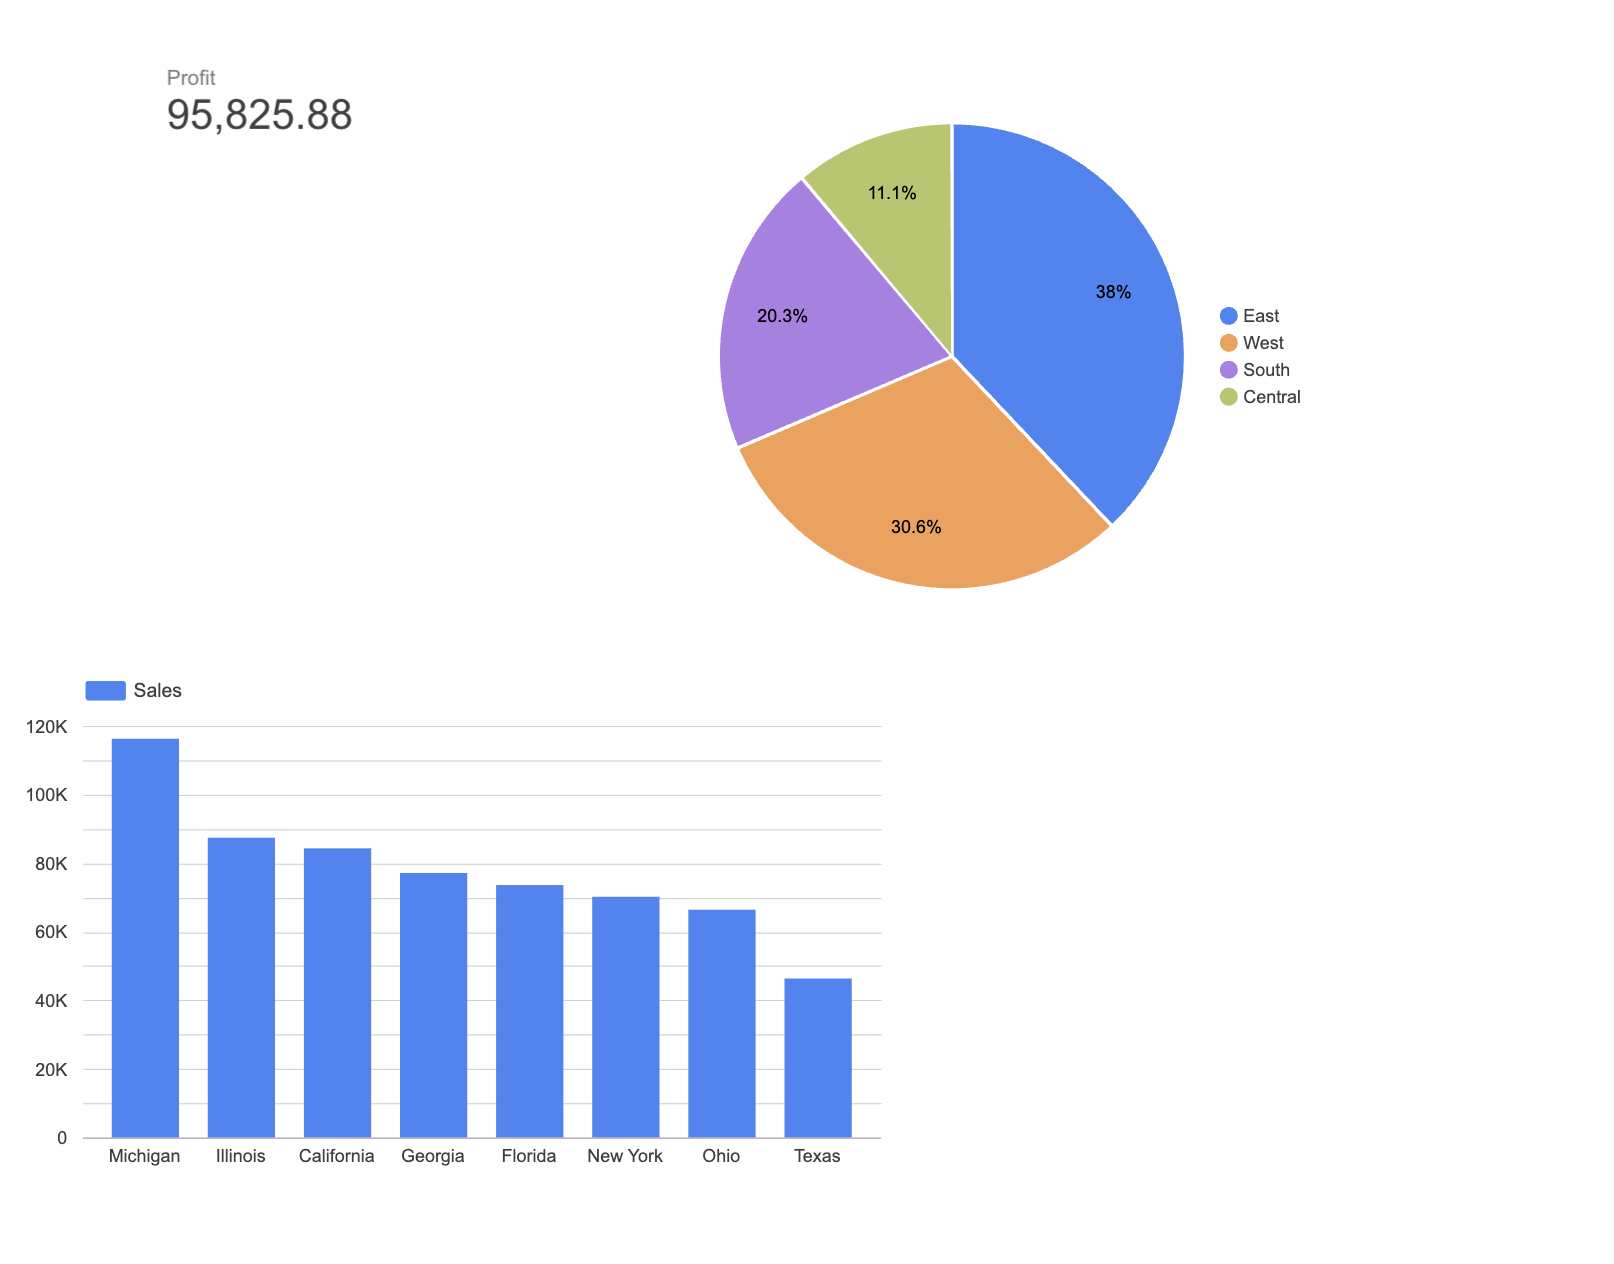

In [6]:
from IPython.display import Image, display
from google.colab import files
import os

# Upload screenshot file
print("Please select your screenshot file (.png or .jpg):")
uploaded = files.upload()

# Display the uploaded screenshot
for filename in uploaded.keys():
    print(f'✓ Uploaded: {filename}')
    print(f'✓ File size: {len(uploaded[filename])} bytes')
    print("\nEmbedded Dashboard Screenshot:")
    display(Image(filename))

Based on the insight from the dashboard that the Central region has the lowest sales, an immediate and specific action for the Sales Director would be to conduct a deep-dive analysis into the Central region's sales performance, focusing on identifying specific underperforming states, product categories, or sales teams to understand the root causes of the low sales and develop targeted strategies to improve performance.

Challenge Question 1: "A manager has a hypothesis: 'For the Office Supplies category, offering higher average discounts does not lead to higher total sales.' Author a single, multi-step prompt for Gemini that first generates the BigQuery SQL to get the necessary data (average discount and total sales per sub-category) and then generates the Plotly code for an interactive scatter plot to visually prove or disprove this hypothesis."

Prompt:

Source table: `retail_sales_data` with columns: Category, Sub_Category, Sales, Discount, Quantity
Filter only for 'Office Supplies' category
Calculate for each sub-category:
Average discount (as percentage, rounded to 2 decimals)
Total sales (sum of all sales)
Number of transactions (count of records)
Return columns: Sub_Category, avg_discount, total_sales, transaction_count
Order by avg_discount descending

Challenge Question 2: "From your bubble chart, you discovered that 'Tables' are a high-sales but negative-profit sub-category. Author a prompt using the Explainer Pattern from our library to generate a simple, non-technical explanation for a sales manager, including an analogy they would understand."

Prompt:

Chart type: Scatter plot
X-axis: avg_discount (as percentage)
Y-axis: total_sales
Color: Sub_Category (distinct colors for each sub-category)
Size: transaction_count (bubble size represents number of transactions)
Hover data: Show all columns (Sub_Category, avg_discount, total_sales, transaction_count)
Add trendline: Linear regression line to show correlation
Title: "Office Supplies: Discount vs Sales Relationship"
Axis labels: "Average Discount (%)" and "Total Sales ($)"
Include correlation coefficient in subtitle or annotation